## Importing Libraries & Data

In [4]:
import pandas as pd 
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [5]:
df = pd.read_csv('../data/Xeek_Well_15-9-15.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17717 entries, 0 to 17716
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WELL       17717 non-null  object 
 1   DEPTH_MD   17717 non-null  float64
 2   GROUP      17717 non-null  object 
 3   FORMATION  15093 non-null  object 
 4   CALI       17635 non-null  float64
 5   RDEP       17717 non-null  float64
 6   RHOB       17521 non-null  float64
 7   GR         17717 non-null  float64
 8   NPHI       13346 non-null  float64
 9   PEF        17662 non-null  float64
 10  DTC        17708 non-null  float64
 11  LITH       17717 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13290 entries, 4371 to 17707
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WELL       13290 non-null  object 
 1   DEPTH_MD   13290 non-null  float64
 2   GROUP      13290 non-null  object 
 3   FORMATION  13290 non-null  object 
 4   CALI       13290 non-null  float64
 5   RDEP       13290 non-null  float64
 6   RHOB       13290 non-null  float64
 7   GR         13290 non-null  float64
 8   NPHI       13290 non-null  float64
 9   PEF        13290 non-null  float64
 10  DTC        13290 non-null  float64
 11  LITH       13290 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.3+ MB


## Building an Isolation Forest Model (2 Features)

In [22]:
anomaly_inputs = ['NPHI', 'RHOB']

In [30]:
model_IF = IsolationForest(contamination=0.05, random_state=42)

In [31]:
model_IF.fit(df[anomaly_inputs])

IsolationForest(contamination=0.05, random_state=42)

In [32]:
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])

In [33]:
df['anomaly'] = model_IF.predict(df[anomaly_inputs])

In [34]:
df.loc[:, ['NPHI', 'RHOB', 'anomaly_scores', 'anomaly']]

,NPHI,RHOB,anomaly_scores,anomaly
4371,0.541850,2.063168,0.124982,1
4372,0.545401,2.051136,0.125667,1
4373,0.548953,2.041540,0.130297,1
4374,0.549356,2.035698,0.136080,1
4375,0.543351,2.029099,0.148357,1
...,...,...,...,...
17703,0.257656,2.391858,0.138498,1
17704,0.264047,2.408428,0.118700,1
17705,0.269605,2.432385,0.105969,1
17706,0.270624,2.452091,0.089170,1


In [35]:
def outlier_plot(data, outlier_method_name, x_var, y_var, xaxis_limits=[0,1], yaxis_limits=[0,1]):
    print(f'Outlier Method: {outlier_method_name}')

    method = f'{outlier_method_name}_anomaly'

    print(f"Number of anomalous values {len(data[data['anomaly']== -1])}")
    print(f"Number of non anomalous values {len(data[data['anomaly']== 1])}")
    print(f"Total Number of Values: {len(data)}")

    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n{len(data[data['anomaly']== 1])} points")
    return g

Outlier Method: IsolationForest
Number of anomalous values 665
Number of non anomalous values 12625
Total Number of Values: 13290


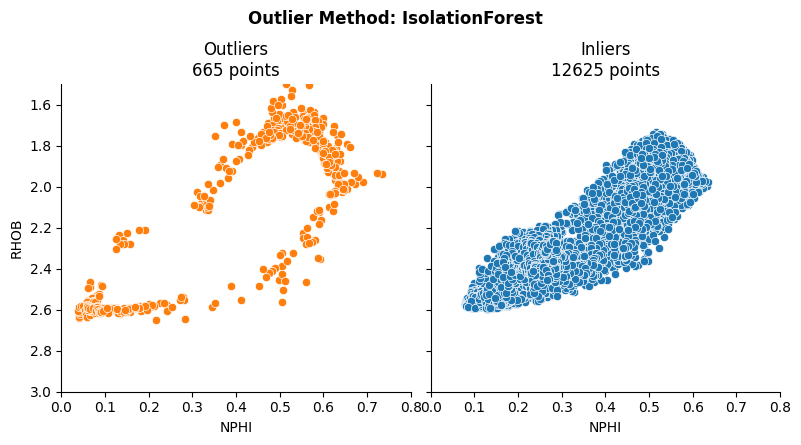

In [36]:
outlier_plot(df, "IsolationForest", "NPHI", "RHOB", [0, 0.8], [3, 1.5])

## Building an Isolation Forest Model Using Multiple Features

In [37]:
anomaly_inputs = ['NPHI', 'RHOB', 'GR', 'CALI', 'PEF', 'DTC']

In [38]:
model_IF = IsolationForest(contamination=0.05, random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])

Outlier Method: IsolationForest
Number of anomalous values 665
Number of non anomalous values 12625
Total Number of Values: 13290


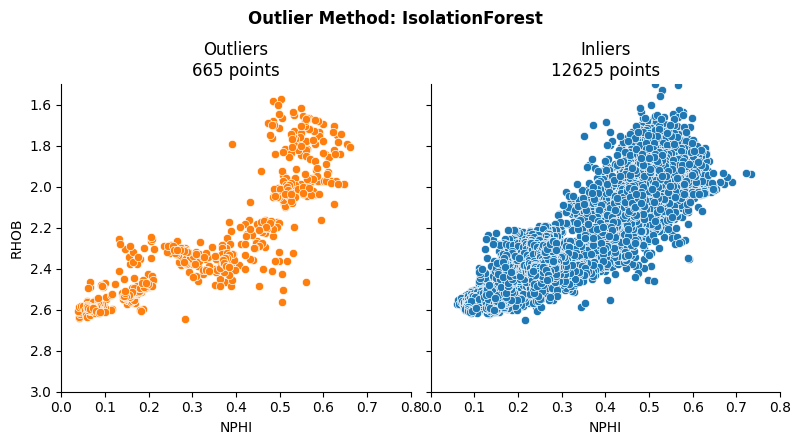

In [39]:
outlier_plot(df, 'IsolationForest', 'NPHI', 'RHOB', [0, 0.8], [3, 1.5])

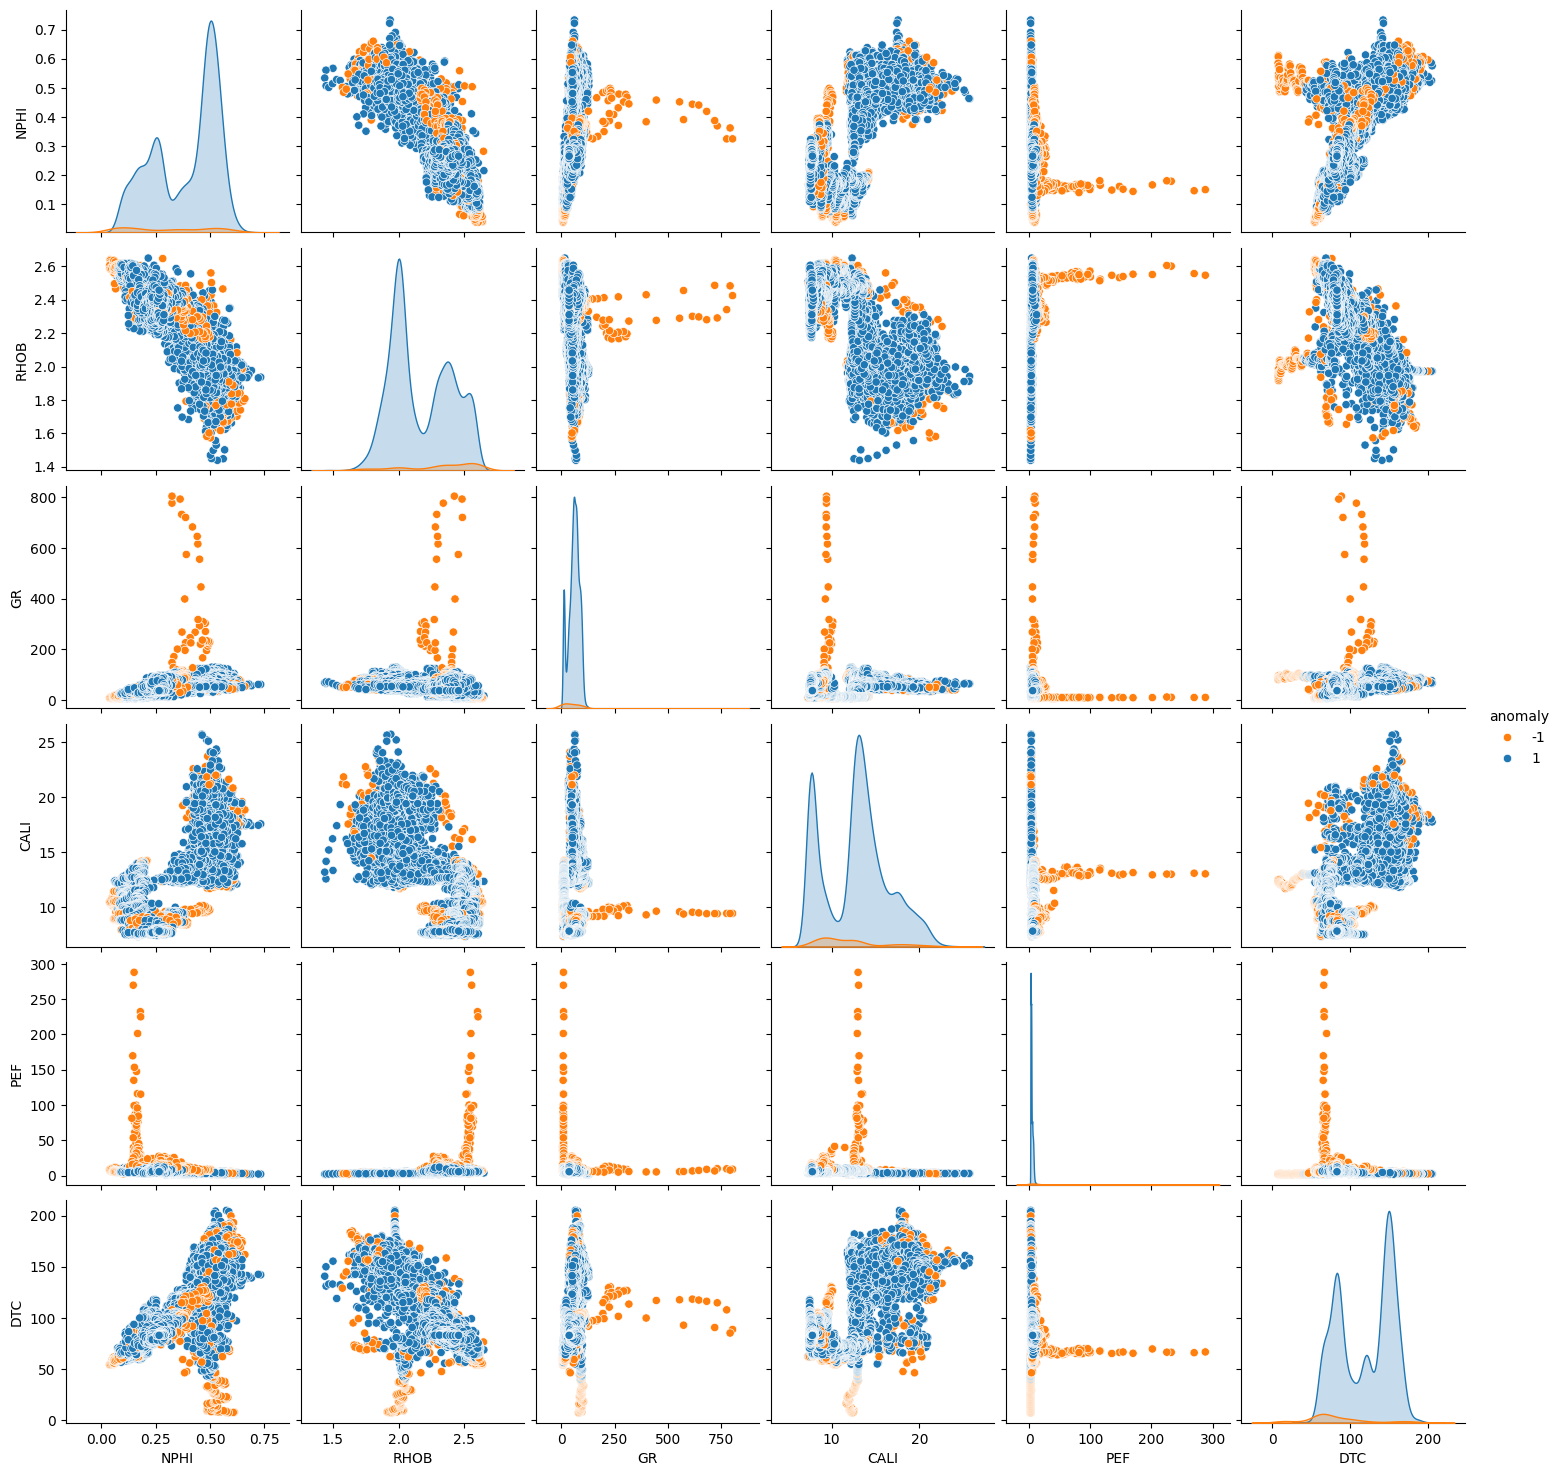

In [40]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)